# **Dataset Creation**

In [ ]:
import pandas as pd
import numpy as np

# Define the number of samples (10,000 tuples)
num_samples = 10000

# Generate patient IDs
patient_ids = np.arange(1, num_samples + 1)

# Generate Age with median 49 and IQR 41-57
age = np.random.normal(loc=49, scale=(57 - 41) / 2, size=num_samples).astype(int)
age = np.clip(age, 18, 90)  # Clipping ages to a reasonable range

# Gender distribution: 74.4% Female, 25.6% Male
gender = np.random.choice(['Female', 'Male'], p=[0.744, 0.256], size=num_samples)

# Race distribution: 84.4% White, 13% Black or African American, 2.6% Unknown, <1% Other
race = np.random.choice(['White', 'Black or African American', 'Unknown', 'Other'],
                        p=[0.8436, 0.13, 0.026, 0.0004], size=num_samples)

# Insurance type: 61.3% Commercial, 38.7% Non-commercial
insurance_type = np.random.choice(['Commercial', 'Non-commercial'], p=[0.613, 0.387], size=num_samples)

# Median income with median $54,428 and IQR $41,734–$70,982
median_income = np.random.normal(loc=54428, scale=(70982 - 41734) / 2, size=num_samples).astype(int)

# Hospitalization prior year: 6.3% Yes, 93.7% No
hospitalization_prior_year = np.random.choice(['Yes', 'No'], p=[0.063, 0.937], size=num_samples)

# MS-related hospitalization: 35.3% Yes among those hospitalized
ms_related_hospitalization = np.where(
    hospitalization_prior_year == 'Yes',
    np.random.choice(['Yes', 'No'], p=[0.353, 0.647], size=num_samples),
    'No'
)

# Relapse prior year: 4.3% Yes, 95.7% No
relapse_prior_year = np.random.choice(['Yes', 'No'], p=[0.043, 0.957], size=num_samples)

# Diseases
diseases = ['Bipolar 1 Disorder', 'Diabetes Mellitus', 'Hypertension', 'Asthma']
disease = np.random.choice(diseases, size=num_samples)

# Therapeutic Area and Specialty Pharma based on Disease
therapeutic_area_map = {
    'Bipolar 1 Disorder': ('Psychiatry', 'Lithium'),
    'Diabetes Mellitus': ('Endocrinology', 'Insulin'),
    'Hypertension': ('Cardiology', 'ACE Inhibitors'),
    'Asthma': ('Pulmonology', 'Inhaled Corticosteroids')
}
therapeutic_area = [therapeutic_area_map[d][0] for d in disease]
specialty_pharma = [therapeutic_area_map[d][1] for d in disease]

# Adherence: 80% Adherent, 20% Non-adherent (as an example)
adherence = np.random.choice(['Adherent', 'Non-adherent'], p=[0.8, 0.2], size=num_samples)

# Trial Length in weeks (random realistic data)
trial_length_weeks = np.random.normal(loc=10.5, scale=8.9, size=num_samples).astype(int)
trial_length_weeks = np.clip(trial_length_weeks, 1, 52)  # Clipping to a realistic range

# Micro Reimbursements: 43.3% Yes, 56.7% No
micro_reimbursements = np.random.choice(['Yes', 'No'], p=[0.433, 0.567], size=num_samples)

# Dose Length in seconds (random realistic data)
dose_length_seconds = np.random.normal(loc=70.5, scale=85.7, size=num_samples).astype(int)
dose_length_seconds = np.clip(dose_length_seconds, 5, 300)  # Clipping to a realistic range

# Dose Delay in hours (random realistic data)
dose_delay_hours = np.random.normal(loc=6.6, scale=4.86, size=num_samples)
dose_delay_hours = np.clip(dose_delay_hours, 0, 24)  # Clipping to a realistic range

# Create the DataFrame
df_large = pd.DataFrame({
    'PatientID': patient_ids,
    'Age': age,
    'Gender': gender,
    'Race': race,
    'InsuranceType': insurance_type,
    'MedianIncome': median_income,
    'HospitalizationPriorYear': hospitalization_prior_year,
    'MSRelatedHospitalization': ms_related_hospitalization,
    'RelapsePriorYear': relapse_prior_year,
    'Disease': disease,
    'TherapeuticArea': therapeutic_area,
    'SpecialtyPharma': specialty_pharma,
    'Adherence': adherence,
    'TrialLengthWeeks': trial_length_weeks,
    'MicroReimbursements': micro_reimbursements,
    'DoseLengthSeconds': dose_length_seconds,
    'DoseDelayHours': dose_delay_hours
})

# Save the DataFrame to a CSV file
csv_file_path_large = "/content/Final_data.csv"
df_large.to_csv(csv_file_path_large, index=False)

csv_file_path_large


'/content/Final_data.csv'

In [ ]:
df_large.head()

,PatientID,Age,Gender,Race,InsuranceType,MedianIncome,HospitalizationPriorYear,MSRelatedHospitalization,RelapsePriorYear,Disease,TherapeuticArea,SpecialtyPharma,Adherence,TrialLengthWeeks,MicroReimbursements,DoseLengthSeconds,DoseDelayHours
0,1,53,Female,Black or African American,Commercial,51493,No,No,No,Bipolar 1 Disorder,Psychiatry,Lithium,Non-adherent,8,Yes,209,8.037371
1,2,60,Male,White,Non-commercial,32229,No,No,No,Asthma,Pulmonology,Inhaled Corticosteroids,Non-adherent,5,No,102,0.000000
2,3,48,Female,White,Commercial,66719,No,No,No,Hypertension,Cardiology,ACE Inhibitors,Adherent,1,No,74,2.888491
3,4,32,Male,Black or African American,Commercial,46116,No,No,No,Hypertension,Cardiology,ACE Inhibitors,Adherent,1,No,5,0.635275
4,5,40,Female,White,Non-commercial,56612,No,No,No,Diabetes Mellitus,Endocrinology,Insulin,Adherent,1,No,19,1.766367


In [ ]:
import pandas as pd
data = pd.read_csv("/content/Data_Adherence_.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0.2              10000 non-null  int64  
 1   Unnamed: 0.1              10000 non-null  int64  
 2   Unnamed: 0                10000 non-null  int64  
 3   PatientID                 10000 non-null  int64  
 4   Age                       10000 non-null  int64  
 5   Gender                    10000 non-null  object 
 6   Race                      10000 non-null  object 
 7   InsuranceType             10000 non-null  object 
 8   MedianIncome              10000 non-null  int64  
 9   HospitalizationPriorYear  10000 non-null  object 
 10  MSRelatedHospitalization  10000 non-null  object 
 11  RelapsePriorYear          10000 non-null  object 
 12  Disease                   10000 non-null  object 
 13  TherapeuticArea           10000 non-null  object 
 14  Special

# Adding Brand and Generics name


In [ ]:
bipolar_medications = [
    ('SYMBYAX', 'OLANZAPINE-FLUOXETINE HCL'),
    ('ZYPREXA', 'OLANZAPINE'),
    ('ZYPREXA ZYDIS', 'OLANZAPINE'),
    ('GEODON', 'ZIPRASIDONE HCL'),
    ('NAVANE', 'THIOTHIXENE'),
    ('ERSACLOZ', 'CLOZAPINE'),
    ('MOBAN', 'MOLINDONE HCL'),
    ('ORAP' ,'PIMOZIDE'),
    # ... (add more if needed)
]
diabetes_medications = [
    ('PRINIVIL', 'LISINOPRIL'),
    ('PRINZIDE', 'LISINOPRIL/HYDROCHLOROTHIAZIDE'),
    ('HYZAAR', 'LOSARTAN POTASSIUM/HYDROCHLOROTHIAZIDE'),
    ('COZAAR', 'LOSARTAN POTASSIUM'),
    ('AVAPRO', 'IRBESARTAN'),
    ('ALTACE', 'RAMIPRIL'),
    ('UNIVASC', 'MOEXIPRIL HCL'),
    ('DIOVAN', 'VALSARTAN'),
    # ... (add more if needed)
]
schizophrenia_medications = [
    ('SYMBYAX', 'OLANZAPINE-FLUOXETINE HCL'),
    ('ZYPREXA', 'OLANZAPINE'),
    ('ZYPREXA ZYDIS', 'OLANZAPINE'),
    ('GEODON', 'ZIPRASIDONE HCL'),
    ('NAVANE', 'THIOTHIXENE'),
    ('ORAP', 'PIMOZIDE'),
    ('FAZACLO', 'CLOZAPINE'),
    ('OLANZAPINE', 'OLANZAPINE'),
    ('ZYPREXA','OLANZAPINE'),
    # ... (add more if needed)
]
asthma_medications = [
    ('ADVAIR', 'FLUTICASONE PROPIONATE AND SALMETEROL'),
    ('ALBUTEROL', 'ALBUTEROL SULFATE'),
    ('ALVESCO', 'CICLESONIDE'),
    ('ASMANEX', 'MOMETASONE FUROATE'),
    ('DULERA', 'MOMETASONE FUROATE AND FORMOTEROL FUMARATE'),
    ('FLOVENT', 'FLUTICASONE PROPIONATE'),
    ('PULMICORT', 'BUDESONIDE'),
    ('QVAR', 'BECLOMETHASONE DIPROPIONATE'),
    ('SINGULAIR', 'MONTELUKAST SODIUM'),
    ('SYMBICORT', 'BUDESONIDE AND FORMOTEROL FUMARATE DIHYDRATE'),
    # ... (add more if needed)
]
hypertension_medications = [
    ('NORVASC', 'AMLODIPINE BESYLATE'),
    ('LOTREL', 'AMLODIPINE BESYLATE AND BENAZEPRIL HCL'),
    ('BENICAR', 'OLMESARTAN MEDOXOMIL'),
    ('BENICAR HCT', 'OLMESARTAN MEDOXOMIL AND HYDROCHLOROTHIAZIDE'),
    ('AVALIDE', 'IRBESARTAN AND HYDROCHLOROTHIAZIDE'),
    ('MICARDIS', 'TELMISARTAN'),
    ('MICARDIS HCT', 'TELMISARTAN AND HYDROCHLOROTHIAZIDE'),
    ('ZESTRIL', 'LISINOPRIL'),
    ('ZESTORETIC', 'LISINOPRIL AND HYDROCHLOROTHIAZIDE'),
    ('COREG', 'CARVEDILOL'),
    # ... (add more if needed)
]

# Function to randomly assign therapeutic areas and medications
def assign_medication(ta):
    if ta == 'Bipolar I Disorder':
        return bipolar_medications[np.random.randint(len(bipolar_medications))]
    elif ta == 'Diabetes Mellitus':
        return diabetes_medications[np.random.randint(len(diabetes_medications))]
    elif ta == 'Schizophrenia':
        return schizophrenia_medications[np.random.randint(len(schizophrenia_medications))]
    elif ta == 'Asthma':
        return asthma_medications[np.random.randint(len(asthma_medications))]
    elif ta == 'Hypertension':
        return hypertension_medications[np.random.randint(len(hypertension_medications))]
    else:
        return ('Unknown', 'Unknown')

# Assign therapeutic areas
medication_info = [assign_medication(ta) for ta in data['Disease']]
medication_names, brand_names = zip(*medication_info)

In [ ]:
# data = data.drop(['MedicationName','BrandName'],axis = 1)

print(medication_names)
data['MedicationName'] = medication_names
data['BrandName'] = brand_names

('Unknown', 'DULERA', 'BENICAR HCT', 'BENICAR', 'ALTACE', 'ADVAIR', 'ADVAIR', 'PULMICORT', 'Unknown', 'PRINZIDE', 'ALBUTEROL', 'Unknown', 'NORVASC', 'BENICAR', 'PRINZIDE', 'Unknown', 'SINGULAIR', 'Unknown', 'PRINZIDE', 'QVAR', 'ALVESCO', 'Unknown', 'COREG', 'AVAPRO', 'SINGULAIR', 'SYMBICORT', 'Unknown', 'SINGULAIR', 'Unknown', 'PRINZIDE', 'ASMANEX', 'ZESTORETIC', 'FLOVENT', 'MICARDIS HCT', 'ALVESCO', 'ZESTORETIC', 'ADVAIR', 'Unknown', 'Unknown', 'ALVESCO', 'ALBUTEROL', 'ASMANEX', 'Unknown', 'ZESTRIL', 'MICARDIS', 'Unknown', 'COZAAR', 'ZESTORETIC', 'DULERA', 'COREG', 'Unknown', 'PRINZIDE', 'Unknown', 'AVAPRO', 'PRINZIDE', 'MICARDIS', 'SYMBICORT', 'ZESTRIL', 'MICARDIS HCT', 'SYMBICORT', 'NORVASC', 'FLOVENT', 'Unknown', 'ALTACE', 'BENICAR', 'Unknown', 'DIOVAN', 'Unknown', 'ALBUTEROL', 'COZAAR', 'ADVAIR', 'MICARDIS HCT', 'BENICAR HCT', 'UNIVASC', 'SINGULAIR', 'COREG', 'ASMANEX', 'COZAAR', 'ASMANEX', 'ZESTRIL', 'COZAAR', 'ZESTORETIC', 'MICARDIS', 'Unknown', 'ZESTRIL', 'DIOVAN', 'HYZAAR', 'Q

In [ ]:
data.isna().sum()

,0
PatientID,0
Age,0
Gender,0
Race,0
InsuranceType,0
MedianIncome,0
HospitalizationPriorYear,0
MSRelatedHospitalization,0
RelapsePriorYear,0
Disease,0


In [ ]:
for i in  data.columns:
  print(i)
  print(data[i].unique())
  print("***"*10)

Unnamed: 0.2
[   0    1    2 ... 9997 9998 9999]
******************************
Unnamed: 0.1
[   0    1    2 ... 9997 9998 9999]
******************************
Unnamed: 0
[   0    1    2 ... 9997 9998 9999]
******************************
PatientID
[    1     2     3 ...  9998  9999 10000]
******************************
Age
[53 60 48 32 40 38 57 49 43 54 52 39 41 45 50 56 46 51 34 42 47 36 55 44
 61 27 37 35 59 69 58 33 64 30 62 63 66 68 67 31 22 29 65 25 72 28 20 70
 18 74 26 80 75 71 76 24 73 23]
******************************
Gender
['FEMALE' 'MALE']
******************************
Race
['BLACK OR AFRICAN AMERICAN' 'WHITE' 'ASIAN' 'OTHER']
******************************
InsuranceType
['COMMERCIAL' 'NON-COMMERCIAL']
******************************
MedianIncome
[51493 32229 66719 ... 58602 79578 52097]
******************************
HospitalizationPriorYear
['NO' 'YES']
******************************
MSRelatedHospitalization
['NO' 'YES']
******************************
RelapsePriorYear
['

# Building XGBoost Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score
# Load the dataset
data = pd.read_csv('/content/Data_Adherence_.csv')


In [ ]:
data = data.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'PatientID'],axis = 1)
data.columns

Index(['Age', 'Gender', 'Race', 'InsuranceType', 'MedianIncome',
       'HospitalizationPriorYear', 'MSRelatedHospitalization',
       'RelapsePriorYear', 'Disease', 'TherapeuticArea', 'SpecialtyPharma',
       'Adherence', 'TrialLengthWeeks', 'MicroReimbursements',
       'DoseLengthSeconds', 'DoseDelayHours', 'MedicationName', 'BrandName'],
      dtype='object')

In [ ]:
# prompt: make all the values in the columns to upper case

for column in data.columns:
  if data[column].dtype in ['object','str']:
    data[column] = data[column].str.upper()


In [ ]:
data['BrandName'].unique()

array(['UNKNOWN', 'MOMETASONE FUROATE AND FORMOTEROL FUMARATE',
       'OLMESARTAN MEDOXOMIL AND HYDROCHLOROTHIAZIDE',
       'OLMESARTAN MEDOXOMIL', 'RAMIPRIL',
       'FLUTICASONE PROPIONATE AND SALMETEROL', 'BUDESONIDE',
       'LISINOPRIL/HYDROCHLOROTHIAZIDE', 'ALBUTEROL SULFATE',
       'AMLODIPINE BESYLATE', 'MONTELUKAST SODIUM',
       'BECLOMETHASONE DIPROPIONATE', 'CICLESONIDE', 'CARVEDILOL',
       'IRBESARTAN', 'BUDESONIDE AND FORMOTEROL FUMARATE DIHYDRATE',
       'MOMETASONE FUROATE', 'LISINOPRIL AND HYDROCHLOROTHIAZIDE',
       'FLUTICASONE PROPIONATE', 'TELMISARTAN AND HYDROCHLOROTHIAZIDE',
       'LISINOPRIL', 'TELMISARTAN', 'LOSARTAN POTASSIUM', 'VALSARTAN',
       'MOEXIPRIL HCL', 'LOSARTAN POTASSIUM/HYDROCHLOROTHIAZIDE',
       'AMLODIPINE BESYLATE AND BENAZEPRIL HCL',
       'IRBESARTAN AND HYDROCHLOROTHIAZIDE'], dtype=object)

In [ ]:
# prompt: make DoseDelayHours rounded off

data['DoseDelayHours'] = data['DoseDelayHours'].round().astype(int)
data['DoseDelayHours'].head()


0    8
1    0
2    3
3    1
4    2
Name: DoseDelayHours, dtype: int64

In [ ]:
# prompt: change the unknown values in Brandname and medication as mode values without UNKNOWN

# Calculate the mode of 'BrandName' excluding "UNKNOWN"
mode_brandname = data[data['BrandName'] != 'UNKNOWN']['BrandName'].mode()[0]

# Calculate the mode of 'MedicationName' excluding "UNKNOWN"
mode_medicationname = data[data['MedicationName'] != 'UNKNOWN']['MedicationName'].mode()[0]

# Replace "UNKNOWN" values with the mode
data['BrandName'] = data['BrandName'].replace('UNKNOWN', mode_brandname)
data['MedicationName'] = data['MedicationName'].replace('UNKNOWN', mode_medicationname)



In [ ]:
data['DoseDelayHours']

0        8
1        0
2        3
3        1
4        2
        ..
9995     5
9996     5
9997     7
9998    10
9999     0
Name: DoseDelayHours, Length: 10000, dtype: int64

In [ ]:
data.to_csv('/content/final.csv')

In [ ]:
# prompt: find the non-adherent values

data[data["Adherence"] == "NON-ADHERENT"]


,Age,Gender,Race,InsuranceType,MedianIncome,HospitalizationPriorYear,MSRelatedHospitalization,RelapsePriorYear,Disease,TherapeuticArea,SpecialtyPharma,Adherence,TrialLengthWeeks,MicroReimbursements,DoseLengthSeconds,DoseDelayHours,MedicationName,BrandName
0,53,FEMALE,BLACK OR AFRICAN AMERICAN,COMMERCIAL,51493,NO,NO,NO,BIPOLAR 1 DISORDER,PSYCHIATRY,LITHIUM,NON-ADHERENT,8,YES,209,8,AVAPRO,LISINOPRIL
1,60,MALE,WHITE,NON-COMMERCIAL,32229,NO,NO,NO,ASTHMA,PULMONOLOGY,INHALED CORTICOSTEROIDS,NON-ADHERENT,5,NO,102,0,DULERA,MOMETASONE FUROATE AND FORMOTEROL FUMARATE
9,43,FEMALE,WHITE,COMMERCIAL,71455,YES,NO,NO,DIABETES MELLITUS,ENDOCRINOLOGY,INSULIN,NON-ADHERENT,25,YES,100,5,PRINZIDE,LISINOPRIL/HYDROCHLOROTHIAZIDE
16,41,FEMALE,WHITE,NON-COMMERCIAL,77636,NO,NO,NO,ASTHMA,PULMONOLOGY,INHALED CORTICOSTEROIDS,NON-ADHERENT,1,NO,69,12,SINGULAIR,MONTELUKAST SODIUM
21,56,MALE,WHITE,NON-COMMERCIAL,36201,NO,NO,NO,BIPOLAR 1 DISORDER,PSYCHIATRY,LITHIUM,NON-ADHERENT,19,NO,102,12,AVAPRO,LISINOPRIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,42,MALE,WHITE,NON-COMMERCIAL,41252,NO,NO,NO,ASTHMA,PULMONOLOGY,INHALED CORTICOSTEROIDS,NON-ADHERENT,5,YES,149,9,SYMBICORT,BUDESONIDE AND FORMOTEROL FUMARATE DIHYDRATE
9986,50,MALE,BLACK OR AFRICAN AMERICAN,COMMERCIAL,68949,NO,NO,NO,BIPOLAR 1 DISORDER,PSYCHIATRY,LITHIUM,NON-ADHERENT,13,YES,163,11,AVAPRO,LISINOPRIL
9988,46,MALE,WHITE,COMMERCIAL,64195,NO,NO,NO,BIPOLAR 1 DISORDER,PSYCHIATRY,LITHIUM,NON-ADHERENT,1,NO,81,9,AVAPRO,LISINOPRIL
9996,54,FEMALE,WHITE,COMMERCIAL,49508,NO,NO,NO,BIPOLAR 1 DISORDER,PSYCHIATRY,LITHIUM,NON-ADHERENT,18,NO,150,5,AVAPRO,LISINOPRIL


In [ ]:
import pandas as pd
import numpy as np
import joblib
import pickle
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the dataset
# data = pd.read_csv('/content/final.csv')

# Separate features (X) and target variable (y)
X = data.drop('Adherence', axis=1)
y = data['Adherence']

# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(type(y_train))

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unseen values
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the XGBoost model with defined parameters
# model = XGBClassifier(
#     learning_rate=0.1,
#     n_estimators=100,
#     max_depth=5,
#     min_child_weight=1,
#     gamma=0,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     objective='binary:logistic',
#     nthread=4,
#     scale_pos_weight=1,
#     seed=27
# )
model = XGBClassifier()
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate user inputs with some missing values and unseen categories
user_inputs = {
    # 'Age': 45,
    # 'Gender': 'Female',
    # 'Race': 'Alien',  # Unseen category
    # 'InsuranceType': 'Commercial',
    # 'MedianIncome': 60000,
    # 'HospitalizationPriorYear': np.nan,  # Missing value
    # 'MSRelatedHospitalization': 'No',
    # 'RelapsePriorYear': 'No',
    # 'Disease': 'Diabetes Mellitus',
    # 'TherapeuticArea': 'Endocrinology',
    # 'SpecialtyPharma': 'Insulin',
    # 'TrialLengthWeeks': 12,
    # 'MicroReimbursements': 'Yes',
    # 'DoseLengthSeconds': 60,
    # 'DoseDelayHours': 2,
    # 'MedicationName': 'PRINIVIL',
    # 'BrandName': 'LISINOPRIL'
    'Age': 38,
    'Gender': 'FEMALE',
    'Race': 'ASIAN',
    'InsuranceType': 'NON-COMMERCIAL',
    'MedianIncome': 64454,
    'HospitalizationPriorYear': 'NO',
    'MSRelatedHospitalization': 'NO',
    'RelapsePriorYear': 'NO',
    'Disease': 'HYPERTENSION',
    'TherapeuticArea': 'CARDIOLOGY',
    'SpecialtyPharma': 'ACE INHIBITORS',
    'TrialLengthWeeks': 11,
    'MicroReimbursements': 'NO',
    'DoseLengthSeconds': 18,
    'DoseDelayHours': 8.177124,
    'MedicationName': 'MICARDIS HCT',
    'BrandName': 'TELMISARTAN AND HYDROCHLOROTHIAZIDE'
}

# Convert user inputs to DataFrame
user_df = pd.DataFrame([user_inputs])

# Make prediction for user inputs
user_prediction = pipeline.predict(user_df)

# Decode the prediction
predicted_adherence = le_y.inverse_transform(user_prediction)[0]

print(f'Predicted Adherence for User: {predicted_adherence}')

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le_y, f)


<class 'numpy.ndarray'>
Accuracy: 0.7883333333333333
Predicted Adherence for User: NON-ADHERENT


In [ ]:
# prompt: give top 100 values of non-adherent values which give non-adherent as output without SettingWithCopyWarning

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import pickle

# Load the dataset
# data = pd.read_csv('/content/Data_Adherence_.csv')

# ... (rest of your code for data preprocessing and model training)

# Load the saved model and preprocessor
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    le_y = pickle.load(f)

# Create a copy of the original DataFrame to avoid SettingWithCopyWarning
data_copy = data.copy()

# Preprocess the data
data_processed = preprocessor.transform(data_copy)

# Make predictions on the entire dataset
predictions = model.predict(data_processed)

# Decode the predictions
predicted_adherence = le_y.inverse_transform(predictions)

# Add the predictions to the copied DataFrame
data_copy['PredictedAdherence'] = predicted_adherence

# Filter out non-adherent predictions
non_adherent_df = data_copy[data_copy['PredictedAdherence'] == 'Non-adherent']

# Get the top 100 values
top_100_non_adherent = non_adherent_df.head(100)

# Display the result
print(top_100_non_adherent)


Empty DataFrame
Columns: [Age, Gender, Race, InsuranceType, MedianIncome, HospitalizationPriorYear, MSRelatedHospitalization, RelapsePriorYear, Disease, TherapeuticArea, SpecialtyPharma, Adherence, TrialLengthWeeks, MicroReimbursements, DoseLengthSeconds, DoseDelayHours, MedicationName, BrandName, PredictedAdherence]
Index: []


In [ ]:
# prompt: check for values wih non-adherent output until non-adherent comes

# Load the saved model, preprocessor, and label encoder
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)
with open('label_encoder.pkl', 'rb') as f:
    le_y = pickle.load(f)

# Create a copy of the original DataFrame
df_copy = data.copy()

# Iterate over the rows of the DataFrame and make predictions
for index, row in df_copy.iterrows():
    # Convert the row to a DataFrame for prediction
    row_df = pd.DataFrame([row])

    # Preprocess the input and make a prediction
    preprocessed_row = preprocessor.transform(row_df)
    prediction = model.predict(preprocessed_row)

    # Decode the prediction
    predicted_adherence = le_y.inverse_transform(prediction)[0]

    # Check if the prediction is "Non-adherent"
    if predicted_adherence == "NON-ADHERENT":
        print(f"Found Non-adherent at index: {index}")
        print(row)
        break  # Exit the loop if "Non-adherent" is found

Found Non-adherent at index: 70
Age                                                            51
Gender                                                       MALE
Race                                                        WHITE
InsuranceType                                          COMMERCIAL
MedianIncome                                                54447
HospitalizationPriorYear                                       NO
MSRelatedHospitalization                                       NO
RelapsePriorYear                                               NO
Disease                                                    ASTHMA
TherapeuticArea                                       PULMONOLOGY
SpecialtyPharma                           INHALED CORTICOSTEROIDS
Adherence                                            NON-ADHERENT
TrialLengthWeeks                                               15
MicroReimbursements                                            NO
DoseLengthSeconds                           

In [ ]:
# prompt: find the count of adherent and non adherent

# Assuming 'data' is your DataFrame and 'Adherence' is the column with adherence information
adherence_counts = data['Adherence'].value_counts()

print(adherence_counts)


Adherence
ADHERENT        7997
NON-ADHERENT    2003
Name: count, dtype: int64


In [ ]:
# prompt: list the values with non adherent alone

# Assuming 'data' is your DataFrame and 'Adherence' is the column with adherence information
non_adherent_values = data[data['Adherence'] == 'NON-ADHERENT']

print(non_adherent_values)


      Age  Gender                       Race   InsuranceType  MedianIncome  \
0      53  FEMALE  BLACK OR AFRICAN AMERICAN      COMMERCIAL         51493   
1      60    MALE                      WHITE  NON-COMMERCIAL         32229   
9      43  FEMALE                      WHITE      COMMERCIAL         71455   
16     41  FEMALE                      WHITE  NON-COMMERCIAL         77636   
21     56    MALE                      WHITE  NON-COMMERCIAL         36201   
...   ...     ...                        ...             ...           ...   
9977   42    MALE                      WHITE  NON-COMMERCIAL         41252   
9986   50    MALE  BLACK OR AFRICAN AMERICAN      COMMERCIAL         68949   
9988   46    MALE                      WHITE      COMMERCIAL         64195   
9996   54  FEMALE                      WHITE      COMMERCIAL         49508   
9998   47  FEMALE                      WHITE  NON-COMMERCIAL         79578   

     HospitalizationPriorYear MSRelatedHospitalization RelapseP

In [ ]:
# prompt: make a single row as dataframe

row_df = pd.DataFrame([non_adherent_values.iloc[70]])
row_df


,Age,Gender,Race,InsuranceType,MedianIncome,HospitalizationPriorYear,MSRelatedHospitalization,RelapsePriorYear,Disease,TherapeuticArea,SpecialtyPharma,Adherence,TrialLengthWeeks,MicroReimbursements,DoseLengthSeconds,DoseDelayHours,MedicationName,BrandName
327,38,FEMALE,ASIAN,NON-COMMERCIAL,64454,NO,NO,NO,HYPERTENSION,CARDIOLOGY,ACE INHIBITORS,NON-ADHERENT,11,NO,18,8.177124,MICARDIS HCT,TELMISARTAN AND HYDROCHLOROTHIAZIDE


In [ ]:
type(row_df['MedicationName'])

pandas.core.series.Series

In [ ]:
# prompt: impute UNKNOWN values in categorical columns with mode in the main data include str

# Impute UNKNOWN values in categorical columns with mode

for col in data.select_dtypes(include=['object']):
  mode_value = data[col].mode()[0]
  data[col] = data[col].replace('UNKNOWN', mode_value)


In [ ]:
# prompt: impute numerical columns with mean in the main data

# Impute missing values with mean for each numerical column
for col in numerical_features:
  mean_value = data[col].mean()
  data[col] = data[col].fillna(mean_value)


In [ ]:
data.to_csv('/content/Data_Adherence_.csv')

In [ ]:
type(data['BrandName'])

pandas.core.series.Series

In [ ]:
df = pd.read_csv('/content/Data_Adherence_.csv')
df['DoseDelayHours'].head()

,DoseDelayHours
0,8
1,0
2,3
3,1
4,2


In [ ]:
# prompt: use xgbregression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# # Load the dataset
# data = pd.read_csv('/content/Final_dataset.csv')

# Separate features (X) and target variable (y)
X = data.drop('Adherence', axis=1)
y = data['Adherence']

# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the XGBoost Regressor model with defined parameters
model = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    nthread=4,
    seed=27
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model (using Mean Squared Error for regression)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Generate user inputs
user_inputs = {
    'Age': 45,
    'Gender': 'Female',
    'Race': 'Alien',
    'InsuranceType': 'Commercial',
    'MedianIncome': 60000,
    'HospitalizationPriorYear': np.nan,
    'MSRelatedHospitalization': 'No',
    'RelapsePriorYear': 'No',
    'Disease': 'Diabetes Mellitus',
    'TherapeuticArea': 'Endocrinology',
    'SpecialtyPharma': 'Insulin',
    'TrialLengthWeeks': 12,
    'MicroReimbursements': 'Yes',
    'DoseLengthSeconds': 60,
    'DoseDelayHours': 2,
    'MedicationName': 'PRINIVIL',
    'BrandName': 'LISINOPRIL'
}

# Convert user inputs to DataFrame
user_df = pd.DataFrame([user_inputs])

# Make prediction for user inputs
user_prediction = pipeline.predict(user_df)

# Since this is regression, you'll get a numerical value
print(f'Predicted Value for User: {user_prediction[0]}')


Mean Squared Error: 0.1616232652603584
Predicted Value for User: 0.16741886734962463


In [ ]:
 data.columns

Index(['Age', 'Gender', 'Race', 'InsuranceType', 'MedianIncome',
       'HospitalizationPriorYear', 'MSRelatedHospitalization',
       'RelapsePriorYear', 'Disease', 'TherapeuticArea', 'SpecialtyPharma',
       'Adherence', 'TrialLengthWeeks', 'MicroReimbursements',
       'DoseLengthSeconds', 'DoseDelayHours', 'MedicationName', 'BrandName'],
      dtype='object')

In [ ]:
data.to_csv('/content/data_adherence.csv')

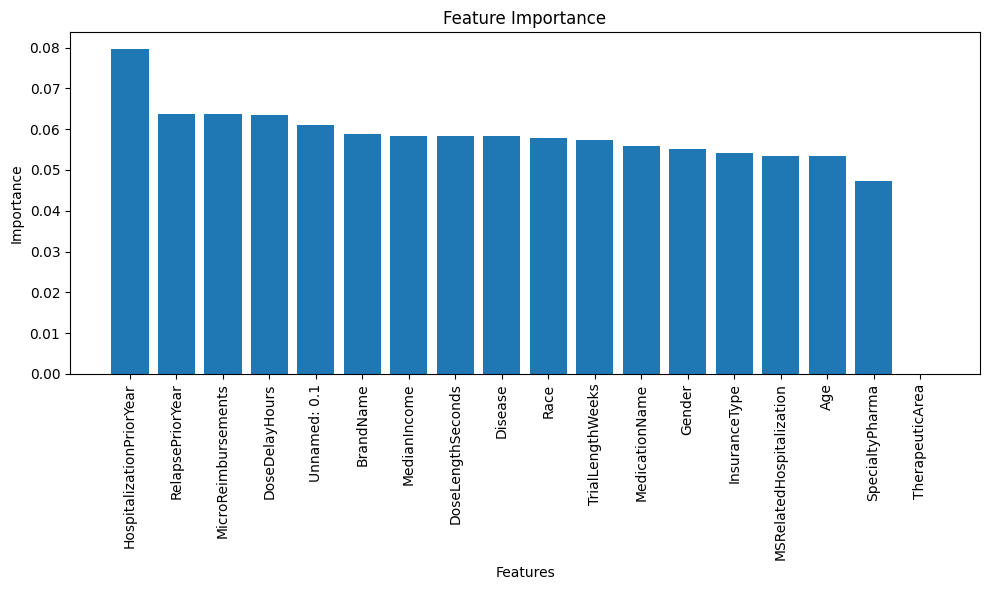

In [ ]:
# prompt: get the most important columns to train with plot  without columns transformation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_adherence.csv')

# Separate features (X) and target variable (y)
X = data.drop(['Unnamed: 0', 'PatientID', 'Adherence'], axis=1)
y = data['Adherence']

# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns

# Label encoding for categorical features
for feature in categorical_features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])

# Initialize and train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


In [ ]:
data['Race'].unique()

array(['BLACK OR AFRICAN AMERICAN', 'WHITE', 'UNKNOWN', 'OTHER'],
      dtype=object)

In [ ]:
# prompt: change unknown value in race column to asian

data['Race'] = data['Race'].replace('UNKNOWN', 'ASIAN')


In [ ]:
# prompt: clean the data

# Load the dataset
data = pd.read_csv('/content/Data_Adherence.csv')

# Drop unnecessary columns
data = data.drop(['Unnamed: 0','Unnamed: 0.1', 'PatientID'], axis=1)

# Handle missing values
# For numerical features, fill with the mean
numerical_features = data.select_dtypes(include=['number']).columns
for feature in numerical_features:
  data[feature] = data[feature].fillna(data[feature].mean())

# For categorical features, fill with the most frequent value
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
  data[feature] = data[feature].fillna(data[feature].mode()[0])

# Convert categorical features to lowercase
for feature in categorical_features:
  data[feature] = data[feature].str.lower()

# Replace inconsistent values
data['Race'] = data['Race'].replace('unknown', 'asian')

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Save the cleaned dataset
data.to_csv('/content/cleaned_data.csv', index=False)


# **XGBClassifier second run**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load the dataset
# data = pd.read_csv('/content/Final_dataset.csv')

# Separate features (X) and target variable (y)
X = data.drop(['Unnamed: 0.2','Adherence'], axis=1)
y = data['Adherence']

# Encode the target variable
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Handle unseen values
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the XGBoost model with defined parameters
model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=27
)

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate user inputs with some missing values and unseen categories
user_inputs = {
    'Age': 45,
    'Gender': 'Female',
    'Race': 'Alien',  # Unseen category
    'InsuranceType': 'Commercial',
    'MedianIncome': 60000,
    'HospitalizationPriorYear': np.nan,  # Missing value
    'MSRelatedHospitalization': 'No',
    'RelapsePriorYear': 'No',
    'Disease': 'Diabetes Mellitus',
    'TherapeuticArea': 'Endocrinology',
    'SpecialtyPharma': 'Insulin',
    'TrialLengthWeeks': 12,
    'MicroReimbursements': 'Yes',
    'DoseLengthSeconds': 60,
    'DoseDelayHours': 2,
    'MedicationName': 'PRINIVIL',
    'BrandName': 'LISINOPRIL'
}

# Convert user inputs to DataFrame
user_df = pd.DataFrame([user_inputs])

# Make prediction for user inputs
user_prediction = pipeline.predict(user_df)

# Decode the prediction
predicted_adherence = le_y.inverse_transform(user_prediction)[0]

print(f'Predicted Adherence for User: {predicted_adherence}')


Accuracy: 0.8085
Predicted Adherence for User: adherent


In [ ]:
data.to_csv('/content/Data_Adherence.csv')

In [ ]:
# prompt: get user custom input and handle unseen values too

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load the dataset and encoders (assuming you have these saved from previous steps)
data = pd.read_csv('/content/Final_dataset.csv')
# ... (load label_encoders and model)

def predict_adherence():
  # Get user input
  user_input = {}
  for feature in data.columns[1:]:  # Exclude 'Unnamed: 0' and 'PatientID'
    if feature == 'Adherence':
      continue
    while True:
      try:
        if feature in numerical_features:
          value = float(input(f'Enter {feature}: '))
        else:
          print(f'Options for {feature}: {data[feature].unique()}')
          value = input(f'Enter {feature}: ')
        user_input[feature] = value
        break
      except ValueError:
        print('Invalid input. Please enter a valid value.')

  # Create a DataFrame from user input
  user_df = pd.DataFrame([user_input])

  # Handle unseen values during encoding
  for feature in categorical_features:
    try:
      user_df[feature] = label_encoders[feature].transform(user_df[feature])
    except ValueError:
      # Handle unseen values (e.g., assign a default value or use a special category)
      user_df[feature] = -1  # Example: Assign -1 for unseen values

  # Impute missing numerical values
  user_df[numerical_features] = imputer.transform(user_df[numerical_features])

  # Make prediction
  prediction = model.predict(user_df)

  # Decode prediction
  adherence = le_y.inverse_transform(prediction)[0]
  print(f'Predicted Adherence: {adherence}')

# Call the function to get user input and predict
predict_adherence()


Options for PatientID: [    1     2     3 ...  9998  9999 10000]
Enter PatientID: 4
Enter Age: 23
Options for Gender: ['Female' 'Male']
Enter Gender: Male
Options for Race: ['Black or African American' 'White' 'Unknown' 'Other']
Enter Race: Unknown
Options for InsuranceType: ['Commercial' 'Non-commercial']
Enter InsuranceType: Commercial
Enter MedianIncome: 54222
Options for HospitalizationPriorYear: ['No' 'Yes']
Enter HospitalizationPriorYear: No
Options for MSRelatedHospitalization: ['No' 'Yes']
Enter MSRelatedHospitalization: Yes
Options for RelapsePriorYear: ['No' 'Yes']
Enter RelapsePriorYear: No
Options for Disease: ['Bipolar 1 Disorder' 'Asthma' 'Hypertension' 'Diabetes Mellitus']
Enter Disease: Asthma
Options for TherapeuticArea: ['Psychiatry' 'Pulmonology' 'Cardiology' 'Endocrinology']
Enter TherapeuticArea: Psychiatry
Options for SpecialtyPharma: ['Lithium' 'Inhaled Corticosteroids' 'ACE Inhibitors' 'Insulin']
Enter SpecialtyPharma: Lithium
Enter TrialLengthWeeks: 23
Options 

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:PatientID: object

In [ ]:
# Placeholder for unseen categories
UNKNOWN_CATEGORY = "Unknown"

# Function to transform input data with handling for unseen categories
def transform_input(input_df, numerical_features, categorical_features, label_encoders, selector):
    # Handling numerical features
    input_df[numerical_features] = imputer.transform(input_df[numerical_features])

    # Handling categorical features
    for feature in categorical_features:
        if feature in input_df:
            # Replace unseen categories with the placeholder
            input_df[feature] = input_df[feature].apply(
                lambda x: x if x in label_encoders[feature].classes_ else UNKNOWN_CATEGORY
            )
            # Append the placeholder to the classes if it wasn't included before
            if UNKNOWN_CATEGORY not in label_encoders[feature].classes_:
                label_encoders[feature].classes_ = np.append(label_encoders[feature].classes_, UNKNOWN_CATEGORY)
            # Encode the feature
            input_df[feature] = label_encoders[feature].transform(input_df[feature])
        else:
            # If feature column is missing, fill with default values or raise an error
            raise ValueError(f"Missing feature {feature} in input data")

    # Select the same features as used for training
    input_df_new = selector.transform(input_df)

    return input_df_new

# Transform the input data
input_df_new = transform_input(input_df, numerical_features, categorical_features, label_encoders, selector)

# Make prediction using the trained model
prediction = model.predict(input_df_new)

# Decode the prediction
predicted_adherence = le_y.inverse_transform(prediction)[0]

# Print the prediction
print(f"Predicted Adherence: {predicted_adherence}")
